In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

import env
import os
import wrangle

import warnings
warnings.filterwarnings("ignore")

# Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [9]:
train, validate, test = wrangle.wrangle_zillow()

print(train.shape)
print(validate.shape)
print(test.shape)

(925923, 9)
(396825, 9)
(330687, 9)


In [10]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,fips,age,6059,6111
1926398,3,2.5,1358,190122,2000,6111,21,0,1
1093088,3,1.0,1275,503991,1929,6037,92,0,0
94299,4,2.0,1657,423906,1963,6059,58,1,0
2117576,4,2.0,1404,235479,1968,6059,53,1,0
1903593,4,2.5,1951,520117,1976,6059,45,1,0


In [11]:
train.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bedrooms,bathrooms,area,taxvalue,age,6059,6111
count,925923,925923,925923,925923,925923,925923,925923
mean,3.13062,1.9454,1523.51,302108,63.4578,0.238904,0.0748788
std,0.743175,0.643792,425.898,178402,19.5686,0.426414,0.263196
min,2,1,502,2733,5,0,0
25%,3,2,1200,161846,52,0,0
50%,3,2,1476,277517,65,0,0
75%,4,2,1821,417714,73,0,0
max,5,4,2499,799999,220,1,1


## Exercise 1

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [70]:
# Create the scaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit scaler on train dataset
scaler.fit(train)

# Transform all three datasets
train_scaled = pd.DataFrame(scaler.transform(train))
validate_scaled = pd.DataFrame(scaler.transform(validate))
test_scaled = pd.DataFrame(scaler.transform(test))

# Rename columns for scaled train dataset
train_scaled.columns = ['bedrooms','bathrooms','area','taxvalue','yearbuilt','fips','age',6059,6111]

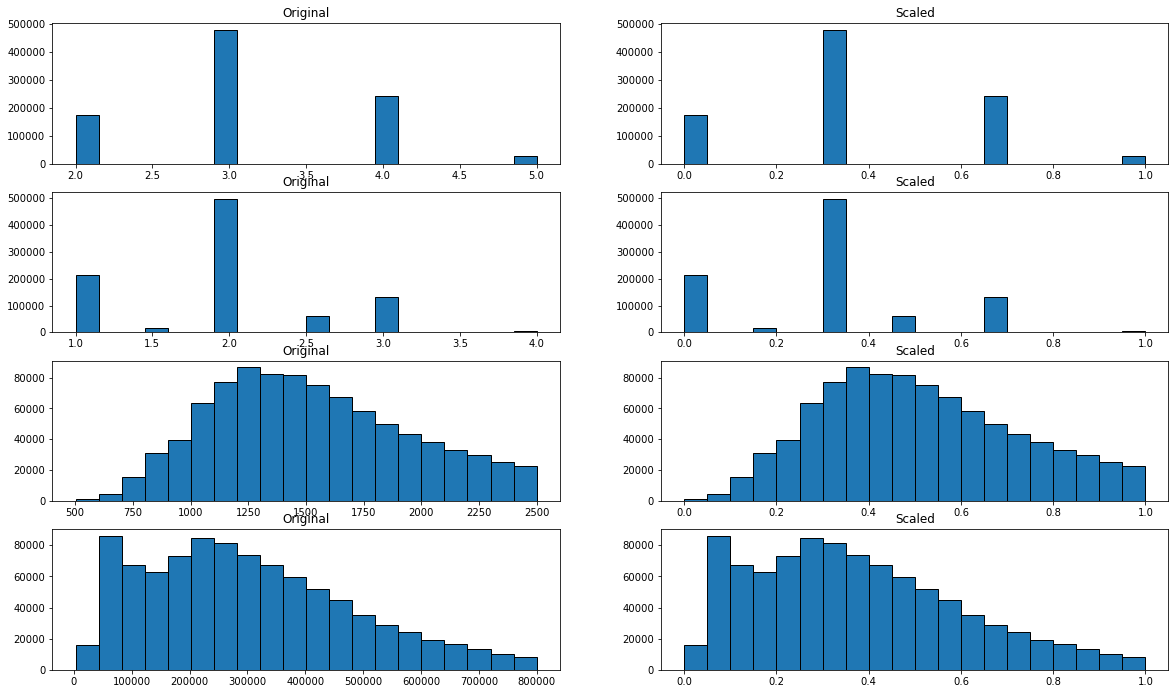

In [72]:
# Plot out original and scaled data
original = train.iloc[:, :5]
scaled = train_scaled.iloc[:, :4]

plt.figure(figsize=(20, 15))
plt.tight_layout()
counter = 1
for o,s in zip(orginal, scaled):
    plt.subplot(5,2,counter)
    plt.hist(original[o], bins=20, ec='black')
    plt.title('Original')
    counter += 1
    plt.subplot(5,2,counter)
    plt.hist(scaled[s], bins=20, ec='black')
    plt.title('Scaled')
    counter += 1

In [73]:
# Create the scaler
scaler2 = sklearn.preprocessing.StandardScaler()

# Fit scaler on train dataset
scaler2.fit(train)

# Transform all three datasets
train_scaled2 = pd.DataFrame(scaler2.transform(train))
validate_scaled2 = pd.DataFrame(scaler2.transform(validate))
test_scaled2 = pd.DataFrame(scaler2.transform(test))

# Rename columns for scaled train dataset
train_scaled2.columns = ['bedrooms','bathrooms','area','taxvalue','yearbuilt','fips','age',6059,6111]

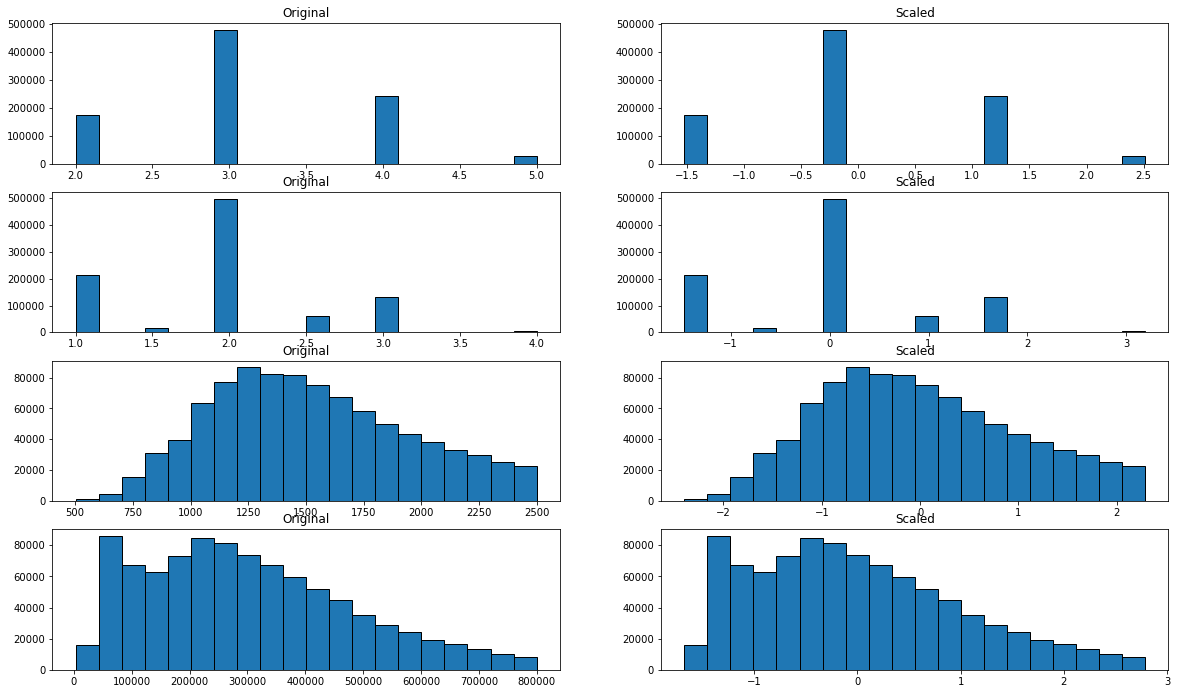

In [74]:
# Plot out original and scaled data
original = train.iloc[:, :5]
scaled2 = train_scaled2.iloc[:, :4]

plt.figure(figsize=(20, 15))
plt.tight_layout()
counter = 1
for o,s in zip(orginal, scaled2):
    plt.subplot(5,2,counter)
    plt.hist(original[o], bins=20, ec='black')
    plt.title('Original')
    counter += 1
    plt.subplot(5,2,counter)
    plt.hist(scaled2[s], bins=20, ec='black')
    plt.title('Scaled')
    counter += 1

In [75]:
# Create the scaler
scaler3 = sklearn.preprocessing.RobustScaler()

# Fit scaler on train dataset
scaler3.fit(train)

# Transform all three datasets
train_scaled3 = pd.DataFrame(scaler3.transform(train))
validate_scaled3 = pd.DataFrame(scaler3.transform(validate))
test_scaled3 = pd.DataFrame(scaler3.transform(test))

# Rename columns for scaled train dataset
train_scaled3.columns = ['bedrooms','bathrooms','area','taxvalue','yearbuilt','fips','age',6059,6111]

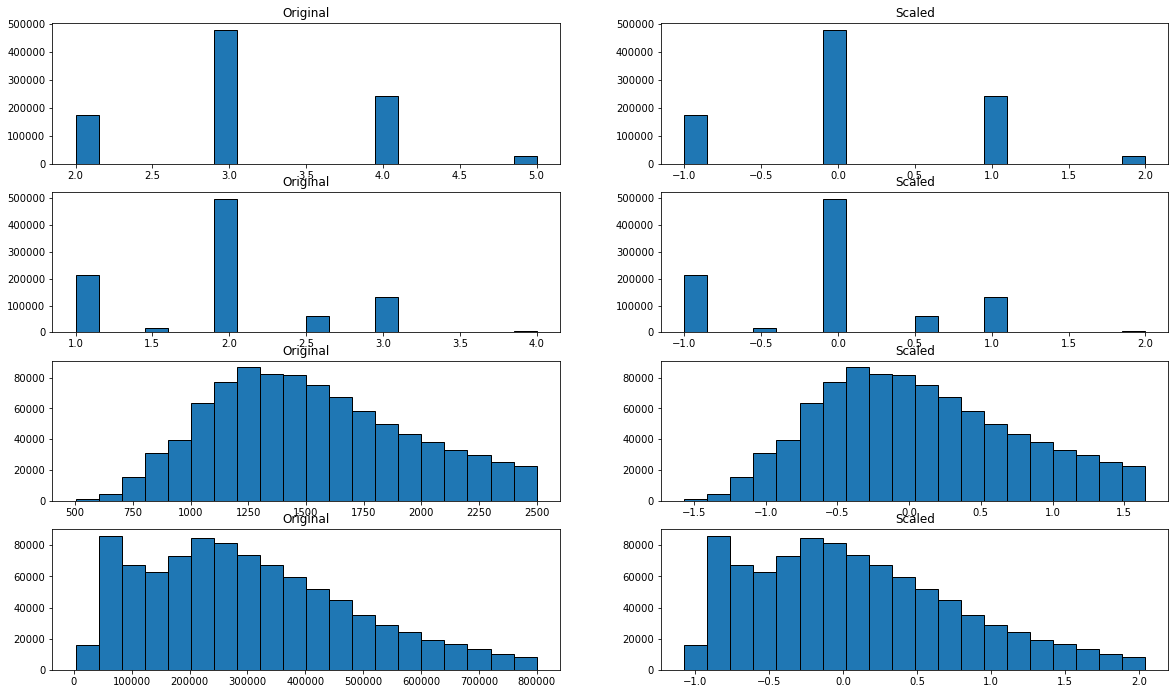

In [76]:
# Plot out original and scaled data
original = train.iloc[:, :5]
scaled3 = train_scaled3.iloc[:, :4]

plt.figure(figsize=(20, 15))
plt.tight_layout()
counter = 1
for o,s in zip(orginal, scaled3):
    plt.subplot(5,2,counter)
    plt.hist(original[o], bins=20, ec='black')
    plt.title('Original')
    counter += 1
    plt.subplot(5,2,counter)
    plt.hist(scaled3[s], bins=20, ec='black')
    plt.title('Scaled')
    counter += 1

In [8]:
# Check the distribution after applying the function
plt.figure(figsize=(16, 4))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'yearbuilt']]

for i, col in enumerate(cols, start=1):

    # Set plot number for subplot
    plot_number = i 

    # Create subplot.
    plt.subplot(2, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()
    
plt.show()

NameError: name 'df' is not defined

<Figure size 1152x288 with 0 Axes>